In [1]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
pd.set_option('display.max_columns', 100)
from geopandas import GeoDataFrame
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mapclassify as mc
# import pysal

## Aggregating deeds by census block for each year


### 1. importing deeds and census blocks

In [2]:
deeds = gpd.read_file("../00_data/PROCESSED/realestate_tax_transfers/rtt_investors_classified.geojson")
deeds.crs = {'init':'epsg:2272'}

In [3]:
deeds.head()

id C_DIG1   C_DIG1DESC C_DIG2          C_DIG2DESC C_DIG3  \
0  0      1  Residential     12  Residential Medium    121   
1  1      1  Residential     11     Residential Low    112   
2  2      1  Residential     12  Residential Medium    121   
3  3      1  Residential     12  Residential Medium    121   
4  4      1  Residential     11     Residential Low    111   

                 C_DIG3DESC  OBJECTID   Shape__Are  Shape__Len       VACBLDG  \
0      Residential Rowhouse   7744699   952.673950  165.045972  Fully Vacant   
1  Residential SemiDetached   7744935  3395.618225  298.879760          None   
2      Residential Rowhouse   7744943  1717.321350  237.627137          None   
3      Residential Rowhouse   7744945  1555.363403  195.088770          None   
4      Residential Detached   7744231  6734.606567  352.840272          None   

   YEAR  address_high  address_low address_low_frac address_low_suffix  \
0  2014           NaN       3083.0             None               None   
1  2016           NaN       3631.0             None               None   
2  2015           NaN       3430.0             None               None   
3  2012           NaN       5809.0             None               None   
4  2013           NaN       1403.0             None               None   

   adjusted_assessed_value  adjusted_cash_consideration  \
0                      NaN                      58900.0   
1                      NaN                      92000.0   
2                      NaN                     123000.0   
3                      NaN                      93000.0   
4                      NaN                      68500.0   

   adjusted_fair_market_value  adjusted_local_tax_amount  \
0                    30699.84                     1767.0   
1                    63936.00                     2760.0   
2                    43066.56                     3690.0   
3                    45344.64                     2790.0   
4                   305913.60                     2055.0   

   adjusted_other_consideration  adjusted_state_tax_amount  \
0                           NaN                      589.0   
1                           NaN                      920.0   
2                           NaN                     1230.0   
3                           NaN                      930.0   
4                           NaN                      685.0   

   adjusted_total_consideration  assessed_value  cash_consideration  \
0                       58900.0             NaN             58900.0   
1                       92000.0             NaN             92000.0   
2                      123000.0             NaN            123000.0   
3                       93000.0             NaN             93000.0   
4                       68500.0             NaN             68500.0   

   common_level_ratio condo_name discrepancy display_date_x display_date_y  \
0                 NaN       None          no     2004-04-02            NaT   
1                 NaN       None          no     2000-05-25            NaT   
2                 NaN       None          no     2004-05-28            NaT   
3                 NaN       None          no     2004-05-28            NaT   
4                 NaN       None          no     2004-05-12            NaT   

  document_date  document_id document_type              elapsed  elapsed_days  \
0    2004-04-02     50942296          DEED -9223372036854775808           NaN   
1    2000-05-25     50092387          DEED -9223372036854775808           NaN   
2    2004-05-28     50942514          DEED -9223372036854775808           NaN   
3    2004-05-28     50942516          DEED -9223372036854775808           NaN   
4    2004-05-12     50941882          DEED -9223372036854775808           NaN   

   fair_market_value       grantees_x_x grantees_x_y  grantees_y  \
0           30699.84    IRWIN LEIGHANNE         None       False   
1           63936.00  FALLEN PAUL J III         None       False   
2           43066.56      R

In [4]:
deeds['count_field'] = 1
deeds['year'] = deeds['sort_year_x'].astype(str)
deeds.head()

id C_DIG1   C_DIG1DESC C_DIG2          C_DIG2DESC C_DIG3  \
0  0      1  Residential     12  Residential Medium    121   
1  1      1  Residential     11     Residential Low    112   
2  2      1  Residential     12  Residential Medium    121   
3  3      1  Residential     12  Residential Medium    121   
4  4      1  Residential     11     Residential Low    111   

                 C_DIG3DESC  OBJECTID   Shape__Are  Shape__Len       VACBLDG  \
0      Residential Rowhouse   7744699   952.673950  165.045972  Fully Vacant   
1  Residential SemiDetached   7744935  3395.618225  298.879760          None   
2      Residential Rowhouse   7744943  1717.321350  237.627137          None   
3      Residential Rowhouse   7744945  1555.363403  195.088770          None   
4      Residential Detached   7744231  6734.606567  352.840272          None   

   YEAR  address_high  address_low address_low_frac address_low_suffix  \
0  2014           NaN       3083.0             None               None   
1  2016           NaN       3631.0             None               None   
2  2015           NaN       3430.0             None               None   
3  2012           NaN       5809.0             None               None   
4  2013           NaN       1403.0             None               None   

   adjusted_assessed_value  adjusted_cash_consideration  \
0                      NaN                      58900.0   
1                      NaN                      92000.0   
2                      NaN                     123000.0   
3                      NaN                      93000.0   
4                      NaN                      68500.0   

   adjusted_fair_market_value  adjusted_local_tax_amount  \
0                    30699.84                     1767.0   
1                    63936.00                     2760.0   
2                    43066.56                     3690.0   
3                    45344.64                     2790.0   
4                   305913.60                     2055.0   

   adjusted_other_consideration  adjusted_state_tax_amount  \
0                           NaN                      589.0   
1                           NaN                      920.0   
2                           NaN                     1230.0   
3                           NaN                      930.0   
4                           NaN                      685.0   

   adjusted_total_consideration  assessed_value  cash_consideration  \
0                       58900.0             NaN             58900.0   
1                       92000.0             NaN             92000.0   
2                      123000.0             NaN            123000.0   
3                       93000.0             NaN             93000.0   
4                       68500.0             NaN             68500.0   

   common_level_ratio condo_name discrepancy display_date_x display_date_y  \
0                 NaN       None          no     2004-04-02            NaT   
1                 NaN       None          no     2000-05-25            NaT   
2                 NaN       None          no     2004-05-28            NaT   
3                 NaN       None          no     2004-05-28            NaT   
4                 NaN       None          no     2004-05-12            NaT   

  document_date  document_id document_type              elapsed  elapsed_days  \
0    2004-04-02     50942296          DEED -9223372036854775808           NaN   
1    2000-05-25     50092387          DEED -9223372036854775808           NaN   
2    2004-05-28     50942514          DEED -9223372036854775808           NaN   
3    2004-05-28     50942516          DEED -9223372036854775808           NaN   
4    2004-05-12     50941882          DEED -9223372036854775808           NaN   

   fair_market_value       grantees_x_x grantees_x_y  grantees_y  \
0           30699.84    IRWIN LEIGHANNE         None       False   
1           63936.00  FALLEN PAUL J III         None       False   
2           43066.56      R

In [5]:
# load residential universe C
res_C = gpd.read_file("../00_data/PROCESSED/land_use/res_C.geojson")


In [6]:
# keeping only the object ID and the geometry fields for the residential parcels
res_C_counts = res_C[['OBJECTID','geometry']]


In [7]:
res_C_counts = res_C_counts.rename(columns={"OBJECTID":"res_parcel_num"})

In [8]:
# reading in tracts shapefiles
# 2000 and 2010
ct00 = gpd.read_file("../00_data/RAW/philadelphia/census_tracts/Census_Tracts_2000.geojson")
ct10 = gpd.read_file("../00_data/RAW/philadelphia/census_tracts/Census_Tracts_2010.geojson")

In [9]:
# reprojecting trscts 
ct00 = ct00.to_crs({'init':'epsg:2272'})
ct10 = ct10.to_crs({'init':'epsg:2272'})

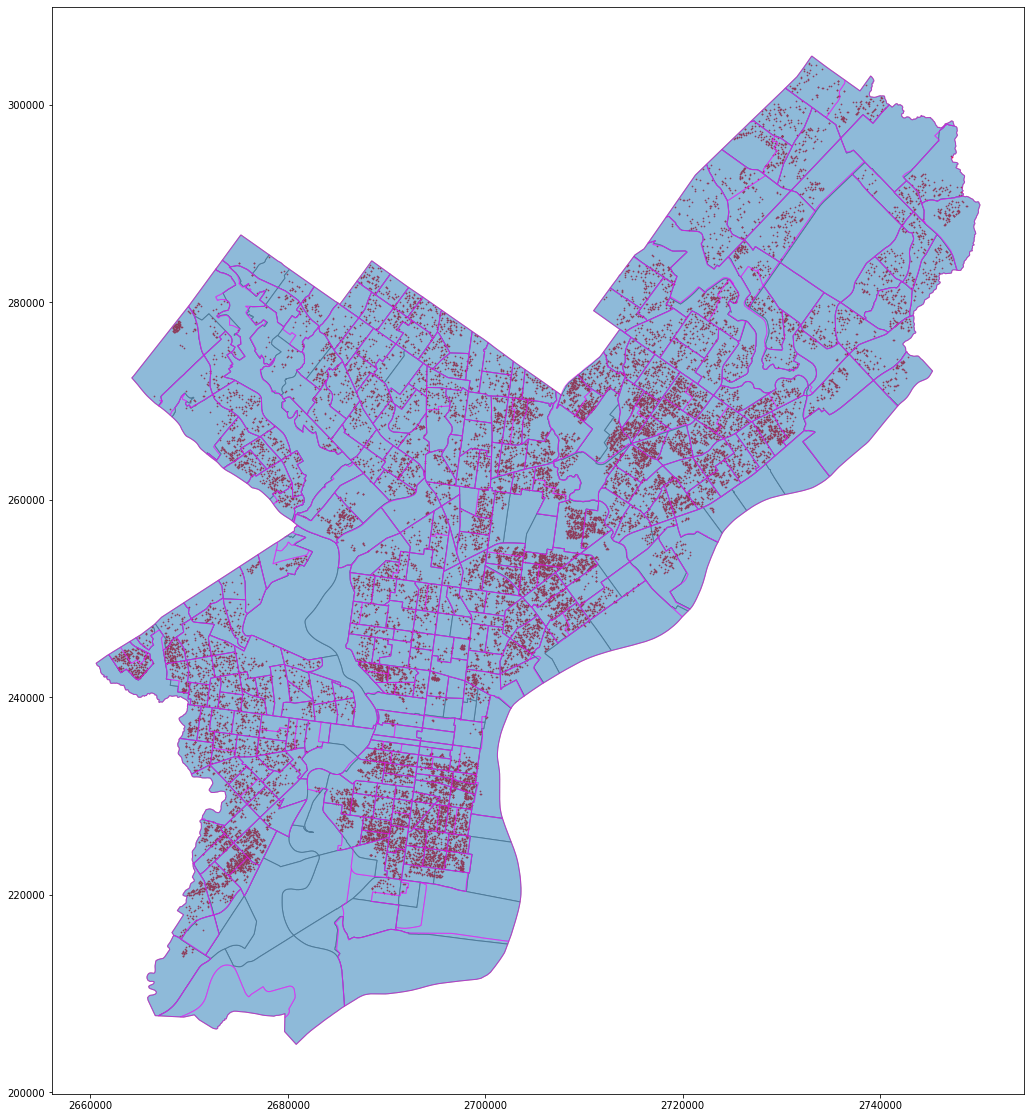

In [13]:
# # use this to check alignment of datasets by plotting
base = ct00.plot(figsize=(20,20),color='white', edgecolor='grey')
deeds.loc[deeds["sort_year_x"]==2000].plot(ax=base, markersize=.5,color='red')
ct10.plot(ax=base,edgecolor='magenta',alpha=.5)

### 2. Spatial join between deeds and blocks & aggregating by year

In [10]:
# prepping datasets for merge
deeds = deeds.drop(columns = ['index_right'])

In [11]:
# spatial join of deeds to two sets of tracts
deeds_ct_00_10 = gpd.sjoin(ct00,deeds.loc[deeds["sort_year_x"]<2010], how='left', op='intersects').reset_index()
deeds_ct_10_18 = gpd.sjoin(ct10,deeds.loc[deeds["sort_year_x"]>=2010], how='left', op='intersects').reset_index()

In [12]:
# getting counts of purchases by type for year block for each year
grouped_ct_deeds00_10 = deeds_ct_00_10.groupby(["STFID","year"]).agg({'investor_all':'sum',
                                                     'owner_occup': 'sum','count_field':'count'}).unstack()

In [13]:
# getting counts of purchases by type for year block for each year
grouped_ct_deeds10_18 = deeds_ct_10_18.groupby(["GEOID10","year",]).agg({'investor_all':'sum',
                                                     'owner_occup': 'sum','count_field':'count'}).unstack()

In [14]:
# unstacking the grouped columns
new_cols = [''.join(t) for t in grouped_ct_deeds00_10.columns]
grouped_ct_deeds00_10.columns = new_cols
new_cols18 = [''.join(t) for t in grouped_ct_deeds10_18.columns]
grouped_ct_deeds10_18.columns = new_cols18


In [15]:
# getting geometry column
ct00_geometry = ct00[['STFID','geometry']]
ct10_geometry = ct10[['GEOID10','geometry']]

In [16]:
# merging grouped blocks with geometry field
grouped_ct_deeds00_10 = ct00_geometry.merge(grouped_ct_deeds00_10,how='left',left_on='STFID',right_on='STFID')
grouped_ct_deeds10_18 = ct10_geometry.merge(grouped_ct_deeds10_18,how='left',left_on='GEOID10',right_on='GEOID10')

# converting to a geodataframe
grouped_ct_deeds00_10 = gpd.GeoDataFrame(grouped_ct_deeds00_10, geometry=grouped_ct_deeds00_10['geometry'])
grouped_ct_deeds10_18 = gpd.GeoDataFrame(grouped_ct_deeds10_18, geometry=grouped_ct_deeds10_18['geometry'])

In [17]:
# joining residential parcels from land use to blocks to have count of parcels
# deeds_b_00_10_i = deeds_b_00_10_i.drop(columns = ['index_right'])
# deeds_b_10_18_i = deeds_b_10_18_i.drop(columns = ['index_right'])
res_ct_00_10 = gpd.sjoin(ct00,res_C_counts, how='left', op='intersects').reset_index() 
res_ct_10_18 = gpd.sjoin(ct10,res_C_counts, how='left', op='intersects').reset_index() 

In [18]:
res_count00 = res_ct_00_10.groupby(["STFID"]).agg({'res_parcel_num':'count'}).reset_index()
res_count10 = res_ct_10_18.groupby(["GEOID10"]).agg({'res_parcel_num':'count'}).reset_index()

In [79]:
grouped_ct_deeds00_10_i = grouped_ct_deeds00_10.merge(res_count00,how='left',left_on='STFID',right_on='STFID')
grouped_ct_deeds10_18_i = grouped_ct_deeds10_18.merge(res_count10,how='left',left_on='GEOID10',right_on='GEOID10')

### 3. calculating percent investor purchases per tract per year

In [20]:
# percent of purchases by block that are investor purchases 2000
grouped_ct_deeds00_10_i['per_inv_2000'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2000']/x['res_parcel_num'], axis=1)
# 2001
grouped_ct_deeds00_10_i['per_inv_2001'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2001']/x['res_parcel_num'], axis=1)
# 2002
grouped_ct_deeds00_10_i['per_inv_2002'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2002']/x['res_parcel_num'], axis=1)
# 2003
grouped_ct_deeds00_10_i['per_inv_2003'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2003']/x['res_parcel_num'], axis=1)
# 2004
grouped_ct_deeds00_10_i['per_inv_2004'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2004']/x['res_parcel_num'], axis=1)
# 2005
grouped_ct_deeds00_10_i['per_inv_2005'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2005']/x['res_parcel_num'], axis=1)
# percent of purchases by block that are investor purchases 2006
grouped_ct_deeds00_10_i['per_inv_2006'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2006']/x['res_parcel_num'], axis=1)
# 2007
grouped_ct_deeds00_10_i['per_inv_2007'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2007']/x['res_parcel_num'], axis=1)
# 2008
grouped_ct_deeds00_10_i['per_inv_2008'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2008']/x['res_parcel_num'], axis=1)
# 2009
grouped_ct_deeds00_10_i['per_inv_2009'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2009']/x['res_parcel_num'], axis=1)
# 2010
grouped_ct_deeds10_18_i['per_inv_2010'] = grouped_ct_deeds10_18_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2010']/x['res_parcel_num'], axis=1)
# 2011
grouped_ct_deeds10_18_i['per_inv_2011'] = grouped_ct_deeds10_18_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2011']/x['res_parcel_num'], axis=1)
# percent of purchases by block that are investor purchases 2012
grouped_ct_deeds10_18_i['per_inv_2012'] = grouped_ct_deeds10_18_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2012']/x['res_parcel_num'], axis=1)
# 2013
grouped_ct_deeds10_18_i['per_inv_2013'] = grouped_ct_deeds10_18_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2013']/x['res_parcel_num'], axis=1)
# 2014
grouped_ct_deeds10_18_i['per_inv_2014'] = grouped_ct_deeds10_18_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2014']/x['res_parcel_num'], axis=1)
# 2015
grouped_ct_deeds10_18_i['per_inv_2015'] = grouped_ct_deeds10_18_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2015']/x['res_parcel_num'], axis=1)
# 2016
grouped_ct_deeds10_18_i['per_inv_2016'] = grouped_ct_deeds10_18_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2016']/x['res_parcel_num'], axis=1)
# 2017
grouped_ct_deeds10_18_i['per_inv_2017'] = grouped_ct_deeds10_18_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['investor_all2017']/x['res_parcel_num'], axis=1)
# percent of purchases by block that are investor purchases 2018
grouped_ct_deeds10_18_i['per_inv_2018'] = grouped_ct_deeds10_18_i.apply(
    lambda x:0 if x['res_parcel_num'] == 0 else x['investor_all2018']/x['res_parcel_num'], axis=1)

In [21]:
grouped_ct_deeds00_10_i.head()

STFID                                           geometry  \
0  42101036203  POLYGON ((2745765.329 286867.592, 2745830.597 ...   
1  42101034500  POLYGON ((2726221.840 286297.206, 2726341.819 ...   
2  42101034200  POLYGON ((2717079.978 286067.903, 2717054.877 ...   
3  42101022600  POLYGON ((2678099.986 284809.453, 2678607.601 ...   
4  42101034100  POLYGON ((2715051.844 284647.894, 2715832.925 ...   

   investor_all2000  investor_all2001  investor_all2002  investor_all2003  \
0              15.0               5.0              11.0               3.0   
1               7.0              10.0              12.0              16.0   
2               2.0               0.0               1.0               3.0   
3               1.0               6.0               2.0               3.0   
4               8.0              13.0              17.0              12.0   

   investor_all2004  investor_all2005  investor_all2006  investor_all2007  \
0               4.0               8.0               7.0               7.0   
1              17.0              12.0               7.0               7.0   
2               4.0               0.0               3.0               3.0   
3               4.0               2.0               2.0               0.0   
4              16.0               9.0              12.0               6.0   

   investor_all2008  investor_all2009  owner_occup2000  owner_occup2001  \
0               4.0               5.0             66.0             58.0   
1              10.0              18.0            111.0             86.0   
2               1.0               2.0             39.0             28.0   
3               0.0               2.0              2.0              2.0   
4               8.0               6.0             63.0             71.0   

   owner_occup2002  owner_occup2003  owner_occup2004  owner_occup2005  \
0             70.0             72.0             64.0             74.0   
1             91.0            112.0            100.0             92.0   
2             28.0             29.0             32.0             37.0   
3              5.0              1.0              5.0              3.0   
4             59.0             68.0             70.0             79.0   

   owner_occup2006  owner_occup2007  owner_occup2008  owner_occup2009  \
0             72.0             53.0             43.0             47.0   
1             66.0             78.0             62.0             49.0   
2             28.0             20.0             21.0             16.0   
3              5.0              1.0              4.0              4.0   
4             76.0             56.0             52.0             58.0   

   count_field2000  count_field2001  count_field2002  count_field2003  \
0             81.0             63.0             81.0             75.0   
1            118.0             96.0            103.0            128.0   
2             41.0             28.0             29.0             32.0   
3              3.0              8.0              7.0              4.0   
4             71.0             84.0             76.0             80.0   

   count_field2004  count_field2005  count_field2006  count_field2007  \
0             68.0             82.0             79.0             60.0   
1            117.0            104.0             73.0             85.0   
2             36.0             37.0             31.0             23.0   
3              9.0              5.0              7.0              1.0   
4             86.0             88.0             88.0             62.0   

   count_field2008  count_field2009  res_parcel_num  per_inv_2000  \
0             47.0             52.0            1813      0.008274   
1             72.0             67.0            1243      0.005632   
2             22.0             18.0             844      0.002370   
3              4.0              6.0             100      0.010000   
4             60.0             64.0            1616      0.004950   

   per_inv_2001  per_inv_2002  per_inv_2003  p

### 4. calculating percent owner purchases per tract per year

In [22]:
# percent of purchases by block that are owner occupier purchases 2000
grouped_ct_deeds00_10_i['per_occ_2000'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2000']/x['res_parcel_num'], axis=1)
# 2001
grouped_ct_deeds00_10_i['per_occ_2001'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2001']/x['res_parcel_num'], axis=1)
# 2002
grouped_ct_deeds00_10_i['per_occ_2002'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2002']/x['res_parcel_num'], axis=1)
# 2003
grouped_ct_deeds00_10_i['per_occ_2003'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2003']/x['res_parcel_num'], axis=1)
# 2004
grouped_ct_deeds00_10_i['per_occ_2004'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2004']/x['res_parcel_num'], axis=1)
# 2005
grouped_ct_deeds00_10_i['per_occ_2005'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2005']/x['res_parcel_num'], axis=1)
# percent of purchases by block that are investor purchases 2006
grouped_ct_deeds00_10_i['per_occ_2006'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2006']/x['res_parcel_num'], axis=1)
# 2007
grouped_ct_deeds00_10_i['per_occ_2007'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2007']/x['res_parcel_num'], axis=1)
# 2008
grouped_ct_deeds00_10_i['per_occ_2008'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2008']/x['res_parcel_num'], axis=1)
# 2009
grouped_ct_deeds00_10_i['per_occ_2009'] = grouped_ct_deeds00_10_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2009']/x['res_parcel_num'], axis=1)
# 2010
grouped_ct_deeds10_18_i['per_occ_2010'] = grouped_ct_deeds10_18_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2010']/x['res_parcel_num'], axis=1)
# 2011
grouped_ct_deeds10_18_i['per_occ_2011'] = grouped_ct_deeds10_18_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2011']/x['res_parcel_num'], axis=1)
# percent of purchases by block that are investor purchases 2012
grouped_ct_deeds10_18_i['per_occ_2012'] = grouped_ct_deeds10_18_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2012']/x['res_parcel_num'], axis=1)
# 2013
grouped_ct_deeds10_18_i['per_occ_2013'] = grouped_ct_deeds10_18_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2013']/x['res_parcel_num'], axis=1)
# 2014
grouped_ct_deeds10_18_i['per_occ_2014'] = grouped_ct_deeds10_18_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2014']/x['res_parcel_num'], axis=1)
# 2015
grouped_ct_deeds10_18_i['per_occ_2015'] = grouped_ct_deeds10_18_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2015']/x['res_parcel_num'], axis=1)
# 2016
grouped_ct_deeds10_18_i['per_occ_2016'] = grouped_ct_deeds10_18_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2016']/x['res_parcel_num'], axis=1)
# 2017
grouped_ct_deeds10_18_i['per_occ_2017'] = grouped_ct_deeds10_18_i.apply(
    lambda x: 0 if x['res_parcel_num'] == 0 else x['owner_occup2017']/x['res_parcel_num'], axis=1)
# percent of purchases by block that are investor purchases 2018
grouped_ct_deeds10_18_i['per_occ_2018'] = grouped_ct_deeds10_18_i.apply(
    lambda x:0 if x['res_parcel_num'] == 0 else x['owner_occup2018']/x['res_parcel_num'], axis=1)

In [23]:
# list comprehension to be able to fill all NaN values with 0 so that morans i will work
var1018 = [i for i in grouped_ct_deeds10_18_i.columns]
var0010 = [i for i in grouped_ct_deeds00_10_i.columns]
var1018.remove('geometry')
var0010.remove('geometry')

In [24]:
grouped_ct_deeds10_18_i = grouped_ct_deeds10_18_i.fillna({f:0 for f in var1018})
grouped_ct_deeds00_10_i = grouped_ct_deeds00_10_i.fillna({f:0 for f in var0010})


In [25]:
grouped_ct_deeds00_10_i.head()

STFID                                           geometry  \
0  42101036203  POLYGON ((2745765.329 286867.592, 2745830.597 ...   
1  42101034500  POLYGON ((2726221.840 286297.206, 2726341.819 ...   
2  42101034200  POLYGON ((2717079.978 286067.903, 2717054.877 ...   
3  42101022600  POLYGON ((2678099.986 284809.453, 2678607.601 ...   
4  42101034100  POLYGON ((2715051.844 284647.894, 2715832.925 ...   

   investor_all2000  investor_all2001  investor_all2002  investor_all2003  \
0              15.0               5.0              11.0               3.0   
1               7.0              10.0              12.0              16.0   
2               2.0               0.0               1.0               3.0   
3               1.0               6.0               2.0               3.0   
4               8.0              13.0              17.0              12.0   

   investor_all2004  investor_all2005  investor_all2006  investor_all2007  \
0               4.0               8.0               7.0               7.0   
1              17.0              12.0               7.0               7.0   
2               4.0               0.0               3.0               3.0   
3               4.0               2.0               2.0               0.0   
4              16.0               9.0              12.0               6.0   

   investor_all2008  investor_all2009  owner_occup2000  owner_occup2001  \
0               4.0               5.0             66.0             58.0   
1              10.0              18.0            111.0             86.0   
2               1.0               2.0             39.0             28.0   
3               0.0               2.0              2.0              2.0   
4               8.0               6.0             63.0             71.0   

   owner_occup2002  owner_occup2003  owner_occup2004  owner_occup2005  \
0             70.0             72.0             64.0             74.0   
1             91.0            112.0            100.0             92.0   
2             28.0             29.0             32.0             37.0   
3              5.0              1.0              5.0              3.0   
4             59.0             68.0             70.0             79.0   

   owner_occup2006  owner_occup2007  owner_occup2008  owner_occup2009  \
0             72.0             53.0             43.0             47.0   
1             66.0             78.0             62.0             49.0   
2             28.0             20.0             21.0             16.0   
3              5.0              1.0              4.0              4.0   
4             76.0             56.0             52.0             58.0   

   count_field2000  count_field2001  count_field2002  count_field2003  \
0             81.0             63.0             81.0             75.0   
1            118.0             96.0            103.0            128.0   
2             41.0             28.0             29.0             32.0   
3              3.0              8.0              7.0              4.0   
4             71.0             84.0             76.0             80.0   

   count_field2004  count_field2005  count_field2006  count_field2007  \
0             68.0             82.0             79.0             60.0   
1            117.0            104.0             73.0             85.0   
2             36.0             37.0             31.0             23.0   
3              9.0              5.0              7.0              1.0   
4             86.0             88.0             88.0             62.0   

   count_field2008  count_field2009  res_parcel_num  per_inv_2000  \
0             47.0             52.0            1813      0.008274   
1             72.0             67.0            1243      0.005632   
2             22.0             18.0             844      0.002370   
3              4.0              6.0             100      0.010000   
4             60.0             64.0            1616      0.004950   

   per_inv_2001  per_inv_2002  per_inv_2003  p

In [26]:
grouped_ct_deeds10_18_i.head()

GEOID10                                           geometry  \
0  42101009400  POLYGON ((2675024.065 238568.719, 2674877.058 ...   
1  42101009500  POLYGON ((2673233.774 241423.764, 2673235.749 ...   
2  42101009600  POLYGON ((2671037.462 239093.841, 2670866.911 ...   
3  42101013800  POLYGON ((2690492.372 245301.050, 2690570.678 ...   
4  42101013900  POLYGON ((2690570.678 245291.312, 2690492.372 ...   

   investor_all2010  investor_all2011  investor_all2012  investor_all2013  \
0              21.0              16.0              13.0              28.0   
1              21.0              32.0              30.0              28.0   
2              19.0              17.0              26.0              31.0   
3               7.0              18.0              19.0              15.0   
4              14.0              12.0              13.0               9.0   

   investor_all2014  investor_all2015  investor_all2016  investor_all2017  \
0              20.0              35.0              42.0              49.0   
1              19.0              40.0              27.0              57.0   
2              39.0              37.0              53.0              70.0   
3              19.0              42.0              44.0              61.0   
4              11.0              12.0              20.0              14.0   

   investor_all2018  investor_all2019  owner_occup2010  owner_occup2011  \
0              43.0              28.0             16.0             13.0   
1              50.0              30.0             22.0             21.0   
2              60.0              31.0             32.0             26.0   
3              87.0              33.0             10.0             18.0   
4              25.0               9.0             40.0             15.0   

   owner_occup2012  owner_occup2013  owner_occup2014  owner_occup2015  \
0             12.0             15.0             11.0             15.0   
1             13.0             24.0             15.0             25.0   
2             17.0             33.0             25.0             31.0   
3             12.0              9.0             14.0             20.0   
4             15.0             16.0              8.0              7.0   

   owner_occup2016  owner_occup2017  owner_occup2018  owner_occup2019  \
0             16.0             21.0             28.0             11.0   
1             13.0             23.0             20.0             14.0   
2             26.0             33.0             30.0             16.0   
3             22.0             27.0             33.0             26.0   
4             12.0             23.0             13.0              9.0   

   count_field2010  count_field2011  count_field2012  count_field2013  \
0             37.0             29.0             25.0             43.0   
1             43.0             53.0             43.0             52.0   
2             51.0             43.0             43.0             64.0   
3             17.0             36.0             31.0             24.0   
4             54.0             27.0             28.0             25.0   

   count_field2014  count_field2015  count_field2016  count_field2017  \
0             31.0             50.0             58.0             70.0   
1             34.0             65.0             40.0             80.0   
2             64.0             68.0             79.0            103.0   
3             33.0             62.0             66.0             88.0   
4             19.0             19.0             32.0             37.0   

   count_field2018  count_field2019  res_parcel_num  per_inv_2010  \
0             71.0             39.0            1297      0.016191   
1             70.0             44.0            1405      0.014947   
2             90.0             47.0            1699      0.011183   
3            120.0             59.0            1005      0.006965   
4             38.0             18.0             582      0.024055   

   per_inv_2011  per_inv_2012  per_inv_2013 

In [27]:
grouped_ct_deeds10_18_i.to_file("../00_data/PROCESSED/grouped_ct_deeds10_18.geojson", driver='GeoJSON')
grouped_ct_deeds00_10_i.to_file("../00_data/PROCESSED/grouped_ct_deeds00_10.geojson", driver='GeoJSON')

### 5. Assessing Global Spatial Autocorrelation Investors

In [ ]:
# # can skip above steps and load in grouped data: 

# grouped_ct_10_18_i = gpd.read_file("../00_data/PROCESSED/grouped_ct_deeds10_18.geojson")
# grouped_ct_00_10_i = gpd.read_file("../00_data/PROCESSED/grouped_ct_deeds00_10.geojson")

In [28]:
from pysal.lib.weights import DistanceBand
from pysal.explore.esda.moran import Moran

/Users/darebrawley/anaconda3/envs/geo-env/lib/python3.7/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/Users/darebrawley/anaconda3/envs/geo-env/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [29]:
# creating spatial weight for 2000-2010 blocks
#  distance band with threshold of 1/2 mile
#  uses a binary method so everything within 1/2 mile gets weighted equally and 
# everything outside is considered not related/not a neighbor 
weight_00_10_inv_d = DistanceBand.from_dataframe(grouped_ct_deeds00_10_i, threshold=2640, binary=False)

/Users/darebrawley/anaconda3/envs/geo-env/lib/python3.7/site-packages/pysal/lib/weights/weights.py:168: UserWarning: There are 107 disconnected observations 
  Island ids: 0, 1, 2, 4, 5, 8, 11, 13, 16, 17, 18, 21, 23, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 46, 47, 48, 59, 61, 63, 65, 66, 67, 68, 69, 71, 74, 79, 82, 84, 89, 90, 91, 93, 94, 95, 97, 104, 105, 108, 109, 112, 118, 120, 121, 126, 129, 132, 133, 137, 139, 145, 151, 154, 156, 157, 162, 164, 173, 181, 185, 214, 215, 218, 223, 235, 236, 249, 256, 260, 261, 268, 302, 313, 321, 324, 328, 332, 335, 343, 350, 352, 365, 369, 371, 373, 376, 377, 378, 379, 380
  " Island ids: %s" % ', '.join(str(island) for island in self.islands))


In [30]:
# no inverse distance, binary threshold
weight_00_10 = DistanceBand.from_dataframe(grouped_ct_deeds00_10_i, threshold=2640, binary=True)

In [31]:
# creating spatial weight for 2010-2018 blocks
#  distance band with threshold of 1/2 mile with inverse distance
#  uses a binary method so everything within 1/2 mile gets weigh
weight_10_18_inv_d = DistanceBand.from_dataframe(grouped_ct_deeds10_18_i, threshold=2640,binary=False)

/Users/darebrawley/anaconda3/envs/geo-env/lib/python3.7/site-packages/pysal/lib/weights/weights.py:168: UserWarning: There are 94 disconnected observations 
  Island ids: 7, 28, 29, 45, 46, 47, 48, 49, 64, 81, 82, 83, 89, 90, 100, 101, 111, 112, 113, 119, 120, 121, 122, 123, 124, 125, 127, 128, 130, 132, 133, 135, 136, 165, 173, 174, 175, 176, 179, 180, 184, 187, 188, 189, 196, 197, 227, 245, 246, 248, 249, 250, 251, 252, 253, 256, 260, 266, 270, 277, 281, 286, 287, 288, 289, 290, 291, 292, 298, 303, 305, 322, 335, 338, 339, 340, 341, 343, 355, 357, 363, 367, 368, 369, 370, 371, 372, 373, 374, 376, 378, 380, 381, 382
  " Island ids: %s" % ', '.join(str(island) for island in self.islands))


In [32]:
# no inverse distance, binary threshold
weight_10_18 = DistanceBand.from_dataframe(grouped_ct_deeds10_18_i, threshold=2640,binary=True)

In [33]:
from pysal.explore.esda.moran import Moran_Local, Moran

def fast_global_morans(dataset, column, spatial_weight):  
    print(column)
    moran_val = Moran(dataset[column].values,spatial_weight)
    print(".I: ", moran_val.I, "p value: ", moran_val.p_sim)
    return(moran_val)

        
def fast_local_morans(dataset, column, spatial_weight):  
    print(column)
    return(Moran_Local(dataset[column].values,spatial_weight))
    

        
    

In [34]:
test_moran2000 = fast_global_morans(grouped_ct_deeds00_10_i,'per_inv_2000',weight_00_10_inv_d)

per_inv_2000
('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighb

In [35]:
test_moran2001 = fast_global_morans(grouped_ct_deeds00_10_i,'per_inv_2001',weight_00_10_inv_d)

per_inv_2001
.I:  0.3148990490499178 p value:  0.001


In [36]:
test_moran2001_binary = fast_global_morans(grouped_ct_deeds00_10_i,'per_inv_2001',weight_00_10)

per_inv_2001
('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighb

In [37]:
test_moran2002 = fast_global_morans(grouped_ct_deeds00_10_i,'per_inv_2002',weight_00_10_inv_d)

per_inv_2002
.I:  0.3118826098237232 p value:  0.001


In [38]:
test_moran2003 = fast_global_morans(grouped_ct_deeds00_10_i,'per_inv_2003',weight_00_10_inv_d)

per_inv_2003
.I:  0.3708859690541525 p value:  0.001


In [39]:
test_moran2004 = fast_global_morans(grouped_ct_deeds00_10_i,'per_inv_2004',weight_00_10_inv_d)

per_inv_2004
.I:  0.3510769279092344 p value:  0.001


In [40]:
test_moran2005 = fast_global_morans(grouped_ct_deeds00_10_i,'per_inv_2005',weight_00_10_inv_d)

per_inv_2005
.I:  0.485482271415647 p value:  0.001


In [41]:
test_moran2006 = fast_global_morans(grouped_ct_deeds00_10_i,'per_inv_2006',weight_00_10_inv_d)

per_inv_2006
.I:  0.44783921623843825 p value:  0.001


In [42]:
test_moran2007 = fast_global_morans(grouped_ct_deeds00_10_i,'per_inv_2007',weight_00_10_inv_d)

per_inv_2007
.I:  0.29806530496812994 p value:  0.001


In [43]:
test_moran2008 = fast_global_morans(grouped_ct_deeds00_10_i,'per_inv_2008',weight_00_10_inv_d)

per_inv_2008
.I:  0.41750695792303016 p value:  0.001


In [44]:
test_moran2010 = fast_global_morans(grouped_ct_deeds10_18_i,'per_inv_2010',weight_10_18_inv_d)

per_inv_2010
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 81, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 83, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 100, ' is an island (no neighbors)')
('WARNING: ', 101, ' is an island (no neighbors)')
('WARNING: ', 111, ' is an island (no neighbors)')
('WARNING: ', 112, ' is an island (no neighbors)')
('WARNING: ', 113, ' is an island (no neighbors)')
('WARNING: ', 119, ' is an island

In [45]:
test_moran2012 = fast_global_morans(grouped_ct_deeds10_18_i,'per_inv_2012',weight_10_18_inv_d)

per_inv_2012
.I:  0.4138924858575557 p value:  0.001


In [46]:
test_moran2013 = fast_global_morans(grouped_ct_deeds10_18_i,'per_inv_2013',weight_10_18_inv_d)

per_inv_2013
.I:  0.26433629206432724 p value:  0.001


In [47]:
test_moran2015 = fast_global_morans(grouped_ct_deeds10_18_i,'per_inv_2015',weight_10_18_inv_d)

per_inv_2015
.I:  0.4431790664065671 p value:  0.001


In [48]:
test_moran2017 = fast_global_morans(grouped_ct_deeds10_18_i,'per_inv_2017',weight_10_18_inv_d)

per_inv_2017
.I:  0.3401631172122073 p value:  0.001


In [49]:
test_moran2018 = fast_global_morans(grouped_ct_deeds10_18_i,'per_inv_2018',weight_10_18_inv_d)

per_inv_2018
.I:  0.3122009843516058 p value:  0.001


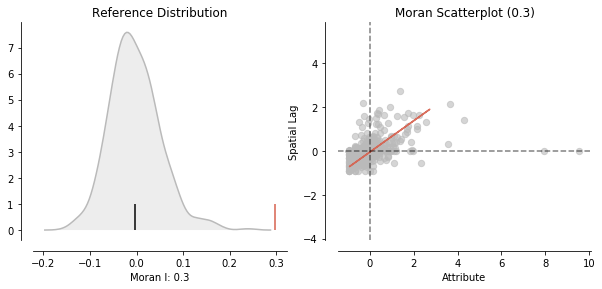

In [50]:
from pysal.viz.splot.esda import plot_moran

plot_moran(test_moran2007, zstandard=True, figsize=(10,4))
plt.show()


### 6. Calculating Local Morans i for blocks and percent investor purchases

In [51]:
moran2000_loc = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2000',weight_00_10_inv_d)
moran2001_loc = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2001',weight_00_10_inv_d)
moran2002_loc = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2002',weight_00_10_inv_d)
moran2003_loc = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2003',weight_00_10_inv_d)
moran2004_loc = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2004',weight_00_10_inv_d)
moran2005_loc = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2005',weight_00_10_inv_d)
moran2006_loc = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2006',weight_00_10_inv_d)
moran2007_loc = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2007',weight_00_10_inv_d)
moran2008_loc = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2008',weight_00_10_inv_d)
moran2009_loc = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2009',weight_00_10_inv_d)


per_inv_2000
per_inv_2001
per_inv_2002
per_inv_2003
per_inv_2004
per_inv_2005
per_inv_2006
per_inv_2007
per_inv_2008
per_inv_2009


In [52]:
moran2010_loc = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2010',weight_10_18_inv_d)
moran2011_loc = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2011',weight_10_18_inv_d)
moran2012_loc = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2012',weight_10_18_inv_d)
moran2013_loc = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2013',weight_10_18_inv_d)
moran2014_loc = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2014',weight_10_18_inv_d)
moran2015_loc = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2015',weight_10_18_inv_d)
moran2016_loc = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2016',weight_10_18_inv_d)
moran2017_loc = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2017',weight_10_18_inv_d)
moran2018_loc = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2018',weight_10_18_inv_d)
# moran2019_loc = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2019',weight_10_18_inv_d)


per_inv_2010
per_inv_2011
per_inv_2012
per_inv_2013
per_inv_2014
per_inv_2015
per_inv_2016
per_inv_2017
per_inv_2018


In [53]:
# alt distance threshold binary
moran2000_loc_binary = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2000',weight_00_10)
moran2001_loc_binary  = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2001',weight_00_10)
moran2002_loc_binary  = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2002',weight_00_10)
moran2003_loc_binary  = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2003',weight_00_10)
moran2004_loc_binary  = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2004',weight_00_10)
moran2005_loc_binary  = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2005',weight_00_10)
moran2006_loc_binary  = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2006',weight_00_10)
moran2007_loc_binary  = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2007',weight_00_10)
moran2008_loc_binary  = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2008',weight_00_10)
moran2009_loc_binary  = fast_local_morans(grouped_ct_deeds00_10_i,'per_inv_2009',weight_00_10)


per_inv_2000
per_inv_2001
per_inv_2002
per_inv_2003
per_inv_2004
per_inv_2005
per_inv_2006
per_inv_2007
per_inv_2008
per_inv_2009


In [54]:
# alt distance threshold binary
moran2010_loc_binary  = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2010',weight_10_18)
moran2011_loc_binary  = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2011',weight_10_18)
moran2012_loc_binary  = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2012',weight_10_18)
moran2013_loc_binary  = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2013',weight_10_18)
moran2014_loc_binary  = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2014',weight_10_18)
moran2015_loc_binary  = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2015',weight_10_18)
moran2016_loc_binary  = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2016',weight_10_18)
moran2017_loc_binary  = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2017',weight_10_18)
moran2018_loc_binary  = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2018',weight_10_18)
# moran2019_loc = fast_local_morans(grouped_ct_deeds10_18_i,'per_inv_2019',weight_10_18)


per_inv_2010
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 81, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 83, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 100, ' is an island (no neighbors)')
('WARNING: ', 101, ' is an island (no neighbors)')
('WARNING: ', 111, ' is an island (no neighbors)')
('WARNING: ', 112, ' is an island (no neighbors)')
('WARNING: ', 113, ' is an island (no neighbors)')
('WARNING: ', 119, ' is an island

### 7. visualizing moran's I results for local blocks and percent investor

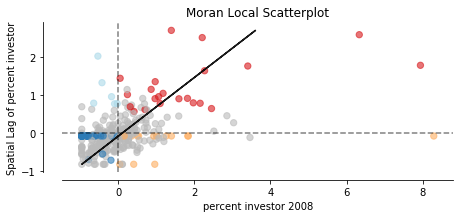

In [78]:
from pysal.viz.splot.esda import moran_scatterplot

fig, ax = moran_scatterplot(moran2008_loc, p=0.05)
ax.set_xlabel('percent investor 2008')
ax.set_ylabel('Spatial Lag of percent investor')
plt.show()

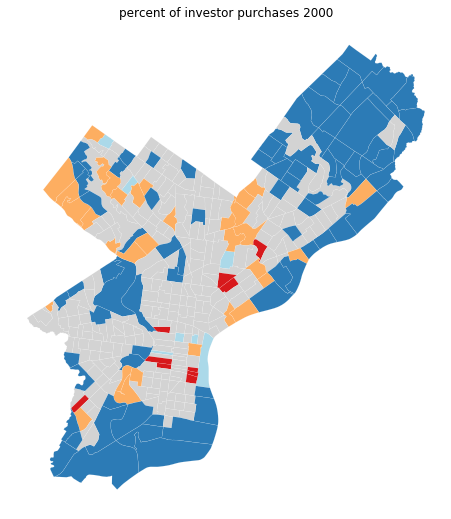

In [85]:
from pysal.viz.splot.esda import lisa_cluster
lisa_cluster(moran2000_loc, grouped_ct_deeds00_10_i, p=0.05, figsize = (9,9),legend=False)
plt.title("percent of investor purchases 2000")
plt.show()

/Users/darebrawley/anaconda3/envs/geo-env/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


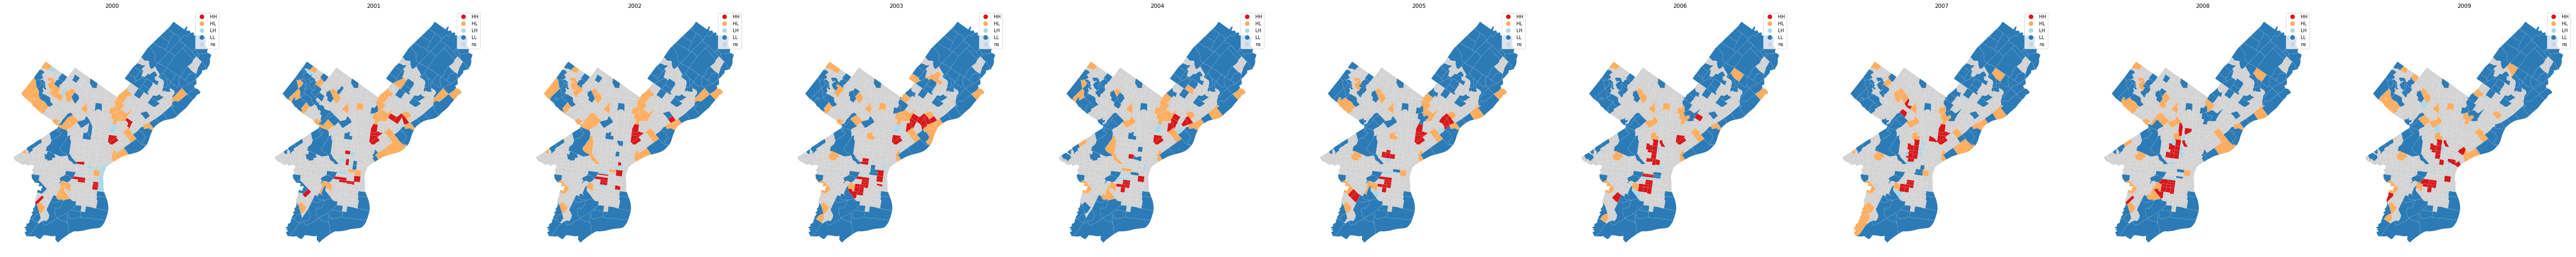

In [57]:
fig, axes = plt.subplots(1,10, figsize=(100,100))
lisa_cluster(moran2000_loc, grouped_ct_deeds00_10_i, p=0.05,ax=axes[0])
axes[0].set_title("2000")
lisa_cluster(moran2001_loc, grouped_ct_deeds00_10_i, p=0.05, ax=axes[1])
axes[1].set_title("2001")
lisa_cluster(moran2002_loc, grouped_ct_deeds00_10_i, p=0.05, ax=axes[2])
axes[2].set_title("2002")
lisa_cluster(moran2003_loc, grouped_ct_deeds00_10_i, p=0.05, ax=axes[3])
axes[3].set_title("2003")
lisa_cluster(moran2004_loc, grouped_ct_deeds00_10_i, p=0.05, ax=axes[4])
axes[4].set_title("2004")
lisa_cluster(moran2005_loc, grouped_ct_deeds00_10_i, p=0.05, ax=axes[5])
axes[5].set_title("2005")
lisa_cluster(moran2006_loc, grouped_ct_deeds00_10_i, p=0.05, ax=axes[6])
axes[6].set_title("2006")
lisa_cluster(moran2007_loc, grouped_ct_deeds00_10_i, p=0.05, ax=axes[7])
axes[7].set_title("2007")
lisa_cluster(moran2008_loc, grouped_ct_deeds00_10_i, p=0.05, ax=axes[8])
axes[8].set_title("2008")
lisa_cluster(moran2009_loc, grouped_ct_deeds00_10_i, p=0.05, ax=axes[9])
axes[9].set_title("2009")
fig.show()

/Users/darebrawley/anaconda3/envs/geo-env/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


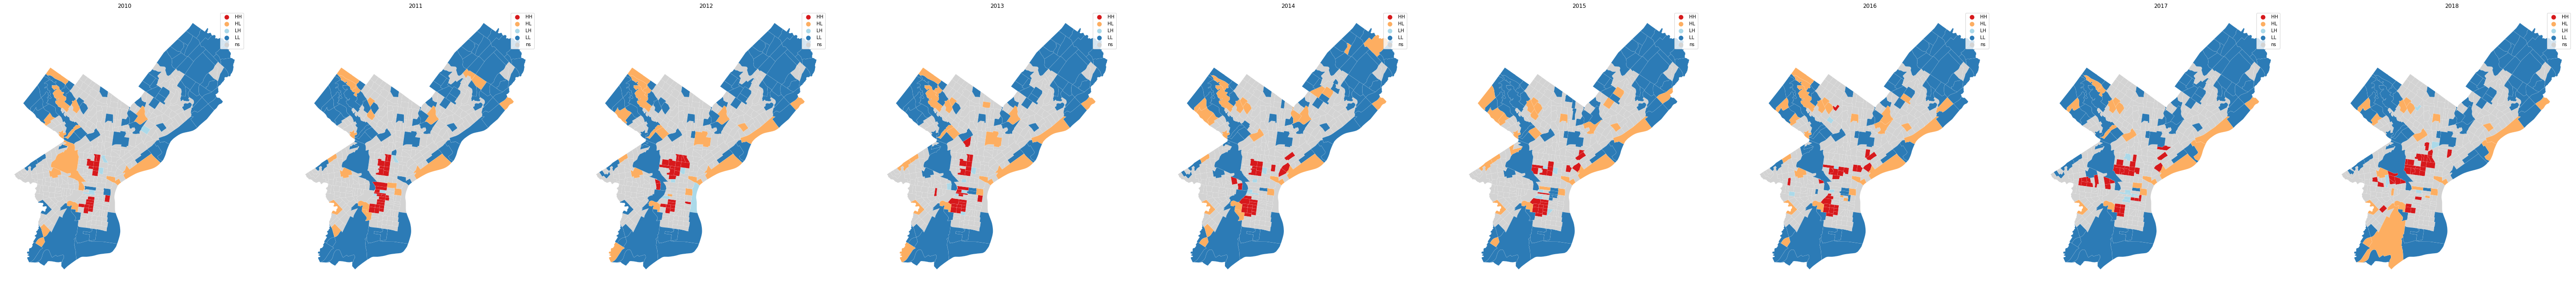

In [58]:
fig, axes = plt.subplots(1,9, figsize=(100,100))
lisa_cluster(moran2010_loc, grouped_ct_deeds10_18_i, p=0.05,ax=axes[0])
axes[0].set_title("2010")
lisa_cluster(moran2011_loc, grouped_ct_deeds10_18_i, p=0.05, ax=axes[1])
axes[1].set_title("2011")
lisa_cluster(moran2012_loc, grouped_ct_deeds10_18_i, p=0.05, ax=axes[2])
axes[2].set_title("2012")
lisa_cluster(moran2013_loc, grouped_ct_deeds10_18_i, p=0.05, ax=axes[3])
axes[3].set_title("2013")
lisa_cluster(moran2014_loc, grouped_ct_deeds10_18_i, p=0.05, ax=axes[4])
axes[4].set_title("2014")
lisa_cluster(moran2015_loc, grouped_ct_deeds10_18_i, p=0.05, ax=axes[5])
axes[5].set_title("2015")
lisa_cluster(moran2016_loc, grouped_ct_deeds10_18_i, p=0.05, ax=axes[6])
axes[6].set_title("2016")
lisa_cluster(moran2017_loc, grouped_ct_deeds10_18_i, p=0.05, ax=axes[7])
axes[7].set_title("2017")
lisa_cluster(moran2018_loc, grouped_ct_deeds10_18_i, p=0.05, ax=axes[8])
axes[8].set_title("2018")
fig.show()

### 8. Visualizing results with binary distance threshold - Investors

/Users/darebrawley/anaconda3/envs/geo-env/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


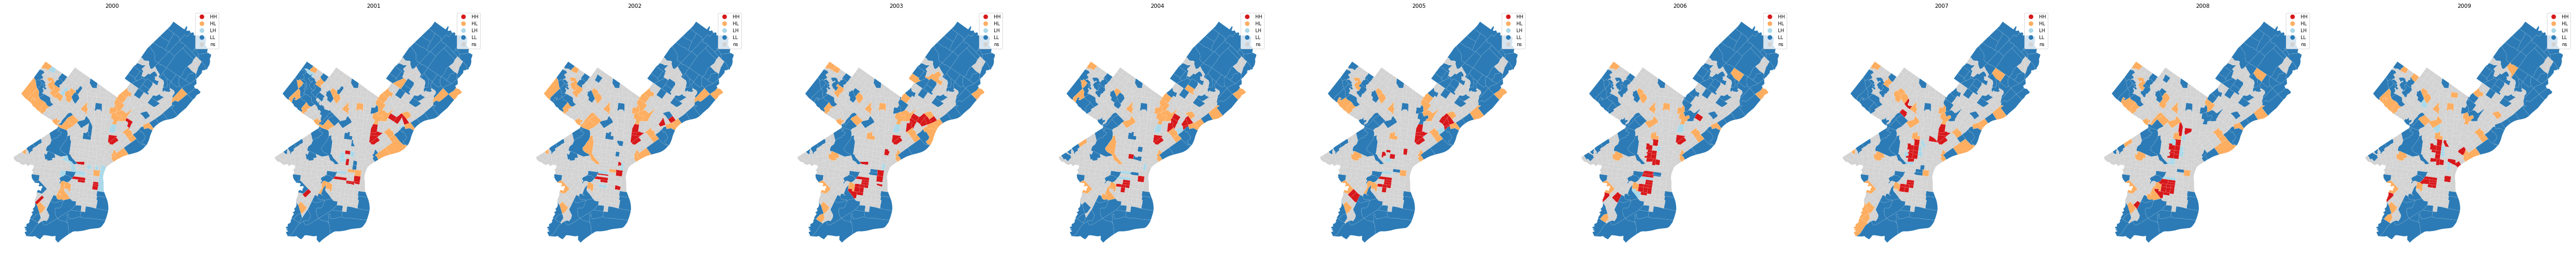

In [59]:
fig, axes = plt.subplots(1,10, figsize=(100,100))
lisa_cluster(moran2000_loc_binary, grouped_ct_deeds00_10_i, p=0.05,ax=axes[0])
axes[0].set_title("2000")
lisa_cluster(moran2001_loc_binary, grouped_ct_deeds00_10_i, p=0.05, ax=axes[1])
axes[1].set_title("2001")
lisa_cluster(moran2002_loc_binary, grouped_ct_deeds00_10_i, p=0.05, ax=axes[2])
axes[2].set_title("2002")
lisa_cluster(moran2003_loc_binary, grouped_ct_deeds00_10_i, p=0.05, ax=axes[3])
axes[3].set_title("2003")
lisa_cluster(moran2004_loc_binary, grouped_ct_deeds00_10_i, p=0.05, ax=axes[4])
axes[4].set_title("2004")
lisa_cluster(moran2005_loc_binary, grouped_ct_deeds00_10_i, p=0.05, ax=axes[5])
axes[5].set_title("2005")
lisa_cluster(moran2006_loc_binary, grouped_ct_deeds00_10_i, p=0.05, ax=axes[6])
axes[6].set_title("2006")
lisa_cluster(moran2007_loc_binary, grouped_ct_deeds00_10_i, p=0.05, ax=axes[7])
axes[7].set_title("2007")
lisa_cluster(moran2008_loc_binary, grouped_ct_deeds00_10_i, p=0.05, ax=axes[8])
axes[8].set_title("2008")
lisa_cluster(moran2009_loc_binary, grouped_ct_deeds00_10_i, p=0.05, ax=axes[9])
axes[9].set_title("2009")
fig.show()

/Users/darebrawley/anaconda3/envs/geo-env/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


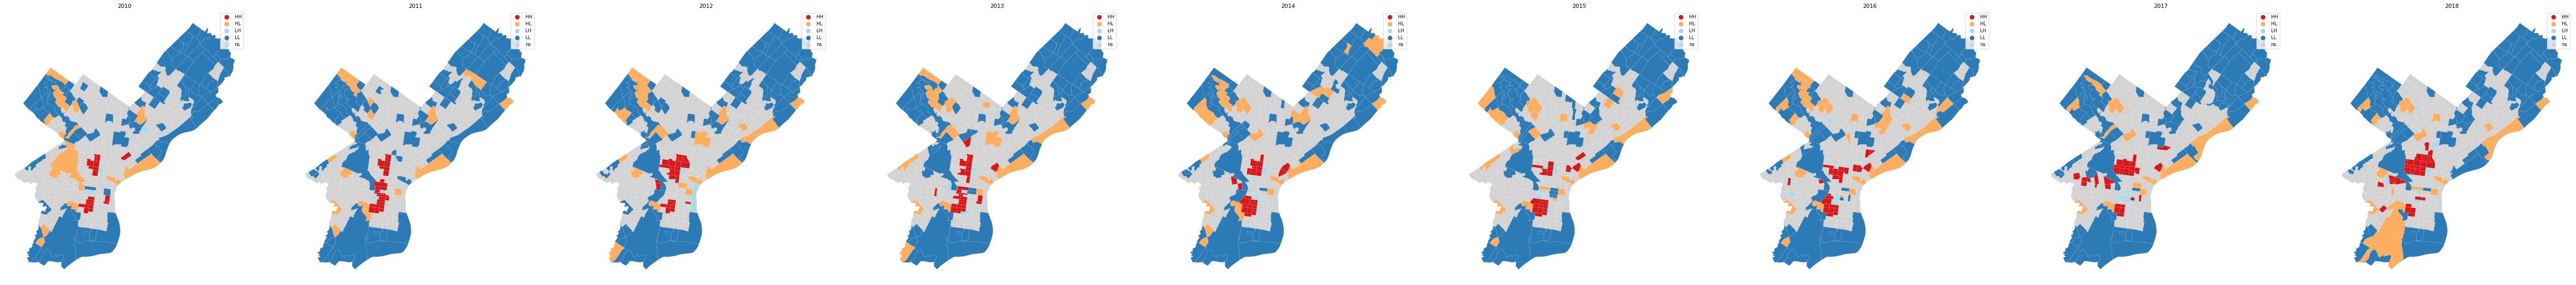

In [60]:
fig, axes = plt.subplots(1,9, figsize=(100,100))
lisa_cluster(moran2010_loc_binary, grouped_ct_deeds10_18_i, p=0.05,ax=axes[0])
axes[0].set_title("2010")
lisa_cluster(moran2011_loc_binary, grouped_ct_deeds10_18_i, p=0.05, ax=axes[1])
axes[1].set_title("2011")
lisa_cluster(moran2012_loc_binary, grouped_ct_deeds10_18_i, p=0.05, ax=axes[2])
axes[2].set_title("2012")
lisa_cluster(moran2013_loc_binary, grouped_ct_deeds10_18_i, p=0.05, ax=axes[3])
axes[3].set_title("2013")
lisa_cluster(moran2014_loc_binary, grouped_ct_deeds10_18_i, p=0.05, ax=axes[4])
axes[4].set_title("2014")
lisa_cluster(moran2015_loc_binary, grouped_ct_deeds10_18_i, p=0.05, ax=axes[5])
axes[5].set_title("2015")
lisa_cluster(moran2016_loc_binary, grouped_ct_deeds10_18_i, p=0.05, ax=axes[6])
axes[6].set_title("2016")
lisa_cluster(moran2017_loc_binary, grouped_ct_deeds10_18_i, p=0.05, ax=axes[7])
axes[7].set_title("2017")
lisa_cluster(moran2018_loc_binary, grouped_ct_deeds10_18_i, p=0.05, ax=axes[8])
axes[8].set_title("2018")
fig.show()

### 9. Local Moran's Occupancy

In [61]:
# alt distance threshold occ
moran2000_loc_occ = fast_local_morans(grouped_ct_deeds00_10_i,'per_occ_2000',weight_00_10)
moran2001_loc_occ  = fast_local_morans(grouped_ct_deeds00_10_i,'per_occ_2001',weight_00_10)
moran2002_loc_occ  = fast_local_morans(grouped_ct_deeds00_10_i,'per_occ_2002',weight_00_10)
moran2003_loc_occ  = fast_local_morans(grouped_ct_deeds00_10_i,'per_occ_2003',weight_00_10)
moran2004_loc_occ  = fast_local_morans(grouped_ct_deeds00_10_i,'per_occ_2004',weight_00_10)
moran2005_loc_occ  = fast_local_morans(grouped_ct_deeds00_10_i,'per_occ_2005',weight_00_10)
moran2006_loc_occ  = fast_local_morans(grouped_ct_deeds00_10_i,'per_occ_2006',weight_00_10)
moran2007_loc_occ  = fast_local_morans(grouped_ct_deeds00_10_i,'per_occ_2007',weight_00_10)
moran2008_loc_occ  = fast_local_morans(grouped_ct_deeds00_10_i,'per_occ_2008',weight_00_10)
moran2009_loc_occ  = fast_local_morans(grouped_ct_deeds00_10_i,'per_occ_2009',weight_00_10)


per_occ_2000
per_occ_2001
per_occ_2002
per_occ_2003
per_occ_2004
per_occ_2005
per_occ_2006
per_occ_2007
per_occ_2008
per_occ_2009


In [62]:
# alt distance threshold occ
moran2010_loc_occ  = fast_local_morans(grouped_ct_deeds10_18_i,'per_occ_2010',weight_10_18)
moran2011_loc_occ  = fast_local_morans(grouped_ct_deeds10_18_i,'per_occ_2011',weight_10_18)
moran2012_loc_occ  = fast_local_morans(grouped_ct_deeds10_18_i,'per_occ_2012',weight_10_18)
moran2013_loc_occ  = fast_local_morans(grouped_ct_deeds10_18_i,'per_occ_2013',weight_10_18)
moran2014_loc_occ  = fast_local_morans(grouped_ct_deeds10_18_i,'per_occ_2014',weight_10_18)
moran2015_loc_occ  = fast_local_morans(grouped_ct_deeds10_18_i,'per_occ_2015',weight_10_18)
moran2016_loc_occ  = fast_local_morans(grouped_ct_deeds10_18_i,'per_occ_2016',weight_10_18)
moran2017_loc_occ  = fast_local_morans(grouped_ct_deeds10_18_i,'per_occ_2017',weight_10_18)
moran2018_loc_occ  = fast_local_morans(grouped_ct_deeds10_18_i,'per_occ_2018',weight_10_18)
# moran2019_loc = fast_local_morans(grouped_ct_deeds10_18_i,'per_occ_2019',weight_10_18)


per_occ_2010
per_occ_2011
per_occ_2012
per_occ_2013
per_occ_2014
per_occ_2015
per_occ_2016
per_occ_2017
per_occ_2018


### 10. Visualizing occupancy local moran's i

/Users/darebrawley/anaconda3/envs/geo-env/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


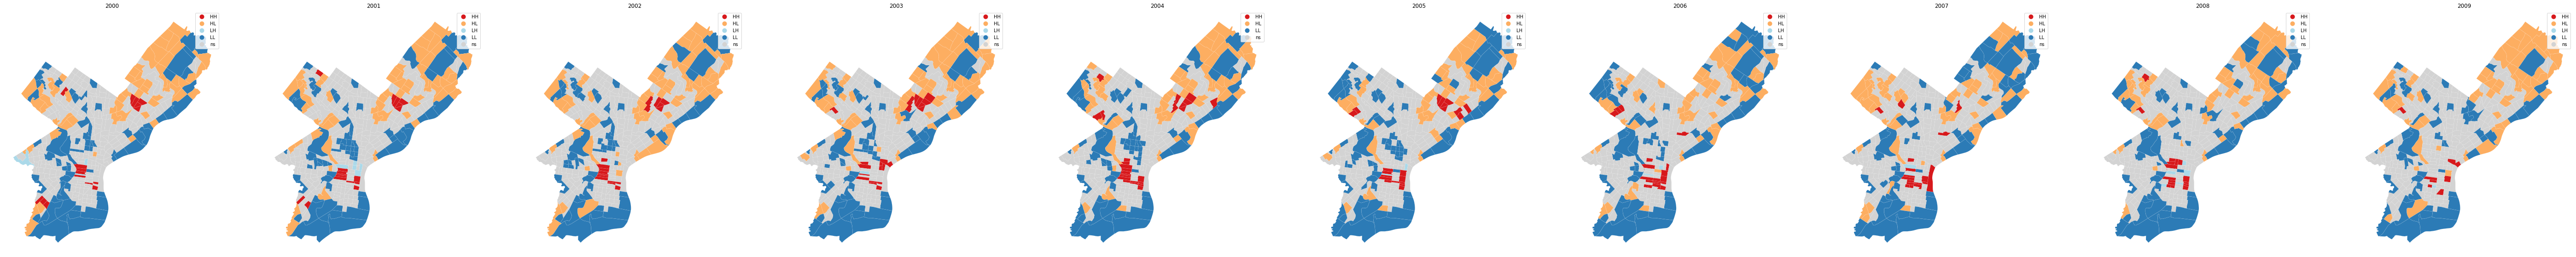

In [63]:
fig, axes = plt.subplots(1,10, figsize=(100,100))
lisa_cluster(moran2000_loc_occ, grouped_ct_deeds00_10_i, p=0.05,ax=axes[0])
axes[0].set_title("2000")
lisa_cluster(moran2001_loc_occ, grouped_ct_deeds00_10_i, p=0.05, ax=axes[1])
axes[1].set_title("2001")
lisa_cluster(moran2002_loc_occ, grouped_ct_deeds00_10_i, p=0.05, ax=axes[2])
axes[2].set_title("2002")
lisa_cluster(moran2003_loc_occ, grouped_ct_deeds00_10_i, p=0.05, ax=axes[3])
axes[3].set_title("2003")
lisa_cluster(moran2004_loc_occ, grouped_ct_deeds00_10_i, p=0.05, ax=axes[4])
axes[4].set_title("2004")
lisa_cluster(moran2005_loc_occ, grouped_ct_deeds00_10_i, p=0.05, ax=axes[5])
axes[5].set_title("2005")
lisa_cluster(moran2006_loc_occ, grouped_ct_deeds00_10_i, p=0.05, ax=axes[6])
axes[6].set_title("2006")
lisa_cluster(moran2007_loc_occ, grouped_ct_deeds00_10_i, p=0.05, ax=axes[7])
axes[7].set_title("2007")
lisa_cluster(moran2008_loc_occ, grouped_ct_deeds00_10_i, p=0.05, ax=axes[8])
axes[8].set_title("2008")
lisa_cluster(moran2009_loc_occ, grouped_ct_deeds00_10_i, p=0.05, ax=axes[9])
axes[9].set_title("2009")
fig.show()

/Users/darebrawley/anaconda3/envs/geo-env/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


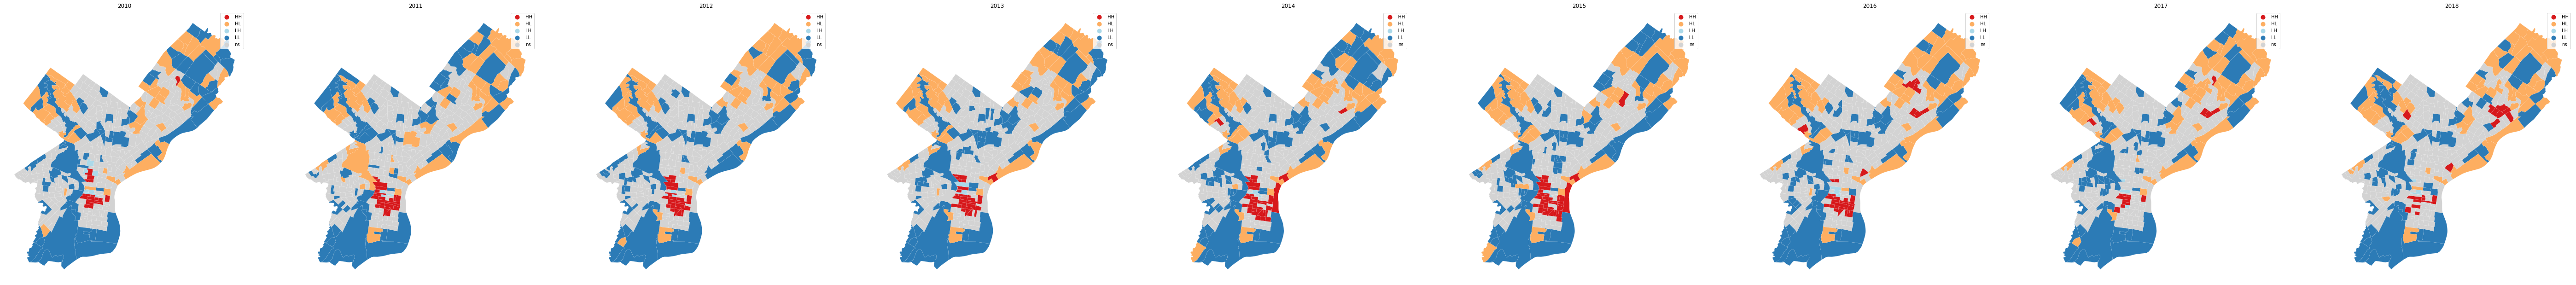

In [64]:
fig, axes = plt.subplots(1,9, figsize=(100,100))
lisa_cluster(moran2010_loc_occ, grouped_ct_deeds10_18_i, p=0.05,ax=axes[0])
axes[0].set_title("2010")
lisa_cluster(moran2011_loc_occ, grouped_ct_deeds10_18_i, p=0.05, ax=axes[1])
axes[1].set_title("2011")
lisa_cluster(moran2012_loc_occ, grouped_ct_deeds10_18_i, p=0.05, ax=axes[2])
axes[2].set_title("2012")
lisa_cluster(moran2013_loc_occ, grouped_ct_deeds10_18_i, p=0.05, ax=axes[3])
axes[3].set_title("2013")
lisa_cluster(moran2014_loc_occ, grouped_ct_deeds10_18_i, p=0.05, ax=axes[4])
axes[4].set_title("2014")
lisa_cluster(moran2015_loc_occ, grouped_ct_deeds10_18_i, p=0.05, ax=axes[5])
axes[5].set_title("2015")
lisa_cluster(moran2016_loc_occ, grouped_ct_deeds10_18_i, p=0.05, ax=axes[6])
axes[6].set_title("2016")
lisa_cluster(moran2017_loc_occ, grouped_ct_deeds10_18_i, p=0.05, ax=axes[7])
axes[7].set_title("2017")
lisa_cluster(moran2018_loc_occ, grouped_ct_deeds10_18_i, p=0.05, ax=axes[8])
axes[8].set_title("2018")
fig.show()

## Stopping here on 2/24

next steps: 
1. create a function that calcuates global morans i for a list of columns and saves results in a dataframe

2. develop method for associating clusters with demographic information (consult rosenblatt)

3. develop functions that plots the results of morans for a list of fields/columns and saves an image for each plot

4. develop method for selecting values where p > 0.05 in order to compare HH clusters per year

In [75]:
# it is possible to get moran local values for a dataframe. 
# use this for comparing clusters of HH values between owner and investor each year


Moran_Local.by_col(grouped_ct_deeds00_10_i,
       ['per_inv_2000','per_inv_2001'],w=weight_00_10_inv_d, inplace=False)

STFID                                           geometry  \
0    42101036203  POLYGON ((2745765.329 286867.592, 2745830.597 ...   
1    42101034500  POLYGON ((2726221.840 286297.206, 2726341.819 ...   
2    42101034200  POLYGON ((2717079.978 286067.903, 2717054.877 ...   
3    42101022600  POLYGON ((2678099.986 284809.453, 2678607.601 ...   
4    42101034100  POLYGON ((2715051.844 284647.894, 2715832.925 ...   
..           ...                                                ...   
376  42101005100  POLYGON ((2686753.077 219564.592, 2687193.802 ...   
377  42101005600  POLYGON ((2672506.447 217934.931, 2672522.206 ...   
378  42101005000  POLYGON ((2690727.170 216439.201, 2690797.752 ...   
379  42101005400  POLYGON ((2668421.625 215867.139, 2668709.971 ...   
380  42101005200  POLYGON ((2680597.874 215854.327, 2680612.817 ...   

     investor_all2000  investor_all2001  investor_all2002  investor_all2003  \
0                15.0               5.0              11.0               3.0   
1                 7.0              10.0              12.0              16.0   
2                 2.0               0.0               1.0               3.0   
3                 1.0               6.0               2.0               3.0   
4                 8.0              13.0              17.0              12.0   
..                ...               ...               ...               ...   
376               0.0               0.0               0.0               0.0   
377               1.0               1.0               1.0               4.0   
378               0.0               0.0               0.0               0.0   
379               2.0               3.0               4.0               1.0   
380               0.0               0.0               0.0               0.0   

     investor_all2004  investor_all2005  investor_all2006  investor_all2007  \
0                 4.0               8.0               7.0               7.0   
1                17.0              12.0               7.0               7.0   
2                 4.0               0.0               3.0               3.0   
3                 4.0               2.0               2.0               0.0   
4                16.0               9.0              12.0               6.0   
..                ...               ...               ...               ...   
376               0.0               0.0               0.0               0.0   
377               0.0               0.0               4.0               7.0   
378               0.0               0.0               0.0               0.0   
379               2.0               2.0               0.0              10.0   
380               0.0               0.0               0.0               0.0   

     investor_all2008  investor_all2009  owner_occup2000  owner_occup2001  \
0                 4.0               5.0             66.0             58.0   
1                10.0              18.0            111.0             86.0   
2                 1.0               2.0             39.0             28.0   
3                 0.0               2.0              2.0              2.0   
4                 8.0               6.0             63.0             71.0   
..                ...               ...              ...              ...   
376               0.0               0.0              0.0              0.0   
377               1.0               2.0              2.0              4.0   
378               0.0               0.0              0.0              0.0   
379               2.0               2.0             18.0             18.0   
380               0.0               0.0              0.0              0.0   

     owner_occup2002  owner_occup2003  owner_occup2004  owner_occup2005  \
0               70.0             72.0             64.0             74.0   
1               91.0            112.0            100.0             92.0   
2               28.0             29.0             32.0             37.0   
3                5.0              1

In [80]:
grouped_ct_deeds00_10_i.head()

STFID                                           geometry  \
0  42101036203  POLYGON ((2745765.329 286867.592, 2745830.597 ...   
1  42101034500  POLYGON ((2726221.840 286297.206, 2726341.819 ...   
2  42101034200  POLYGON ((2717079.978 286067.903, 2717054.877 ...   
3  42101022600  POLYGON ((2678099.986 284809.453, 2678607.601 ...   
4  42101034100  POLYGON ((2715051.844 284647.894, 2715832.925 ...   

   investor_all2000  investor_all2001  investor_all2002  investor_all2003  \
0              15.0               5.0              11.0               3.0   
1               7.0              10.0              12.0              16.0   
2               2.0               0.0               1.0               3.0   
3               1.0               6.0               2.0               3.0   
4               8.0              13.0              17.0              12.0   

   investor_all2004  investor_all2005  investor_all2006  investor_all2007  \
0               4.0               8.0               7.0               7.0   
1              17.0              12.0               7.0               7.0   
2               4.0               0.0               3.0               3.0   
3               4.0               2.0               2.0               0.0   
4              16.0               9.0              12.0               6.0   

   investor_all2008  investor_all2009  owner_occup2000  owner_occup2001  \
0               4.0               5.0             66.0             58.0   
1              10.0              18.0            111.0             86.0   
2               1.0               2.0             39.0             28.0   
3               0.0               2.0              2.0              2.0   
4               8.0               6.0             63.0             71.0   

   owner_occup2002  owner_occup2003  owner_occup2004  owner_occup2005  \
0             70.0             72.0             64.0             74.0   
1             91.0            112.0            100.0             92.0   
2             28.0             29.0             32.0             37.0   
3              5.0              1.0              5.0              3.0   
4             59.0             68.0             70.0             79.0   

   owner_occup2006  owner_occup2007  owner_occup2008  owner_occup2009  \
0             72.0             53.0             43.0             47.0   
1             66.0             78.0             62.0             49.0   
2             28.0             20.0             21.0             16.0   
3              5.0              1.0              4.0              4.0   
4             76.0             56.0             52.0             58.0   

   count_field2000  count_field2001  count_field2002  count_field2003  \
0             81.0             63.0             81.0             75.0   
1            118.0             96.0            103.0            128.0   
2             41.0             28.0             29.0             32.0   
3              3.0              8.0              7.0              4.0   
4             71.0             84.0             76.0             80.0   

   count_field2004  count_field2005  count_field2006  count_field2007  \
0             68.0             82.0             79.0             60.0   
1            117.0            104.0             73.0             85.0   
2             36.0             37.0             31.0             23.0   
3              9.0              5.0              7.0              1.0   
4             86.0             88.0             88.0             62.0   

   count_field2008  count_field2009  res_parcel_num  
0             47.0             52.0            1813  
1             72.0             67.0            1243  
2             22.0             18.0             844  
3              4.0              6.0             100  
4             60.0             64.0            1616